In [1]:
library("dplyr")
library("ggplot2")
library("tidyr")



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
setwd("~/piRNA/Workspaces/julia/PrimaryData/ref_data/human")
#chromosome data
chromosome_data<- read.table("summary_chroms.tsv", header=TRUE)
#Precursors
data_precursors<- read.table("piRNA_prec.bed", header=FALSE)
names(data_precursors)[names(data_precursors) == "V1"]<- "UCSC_CHROM"
data_precursors<- data_precursors[,(-4)]

names(data_precursors)[names(data_precursors) == "V2"]<- "position"
head(data_precursors)

UCSC_CHROM,position,V3,V5
chr1,1496227,1509964,Prepachytene
chr11,8040790,8127654,Prepachytene
chr6,34857041,35059190,Prepachytene
chr6,38136226,38607700,Prepachytene
chr6,41757633,41861898,Prepachytene
chr6,41765382,41863099,Prepachytene


In [4]:
setwd("~/piRNA/Workspaces/julia/zamore_lab/plot")
unique_coverage<- read.table("A1_coverage", header = FALSE)


head(unique_data_new)

V1,V2,V3
NC_000010.11,11738,1
NC_000010.11,11739,1
NC_000010.11,11740,1
NC_000010.11,11741,1
NC_000010.11,11742,1
NC_000010.11,11743,1


position,coverage,CHROM
16217,1,1
16218,1,1
16219,1,1
16220,1,1
16221,1,1
16222,1,1


In [6]:
names(unique_coverage)[names(unique_coverage) == "V1"]<- "REFSEQ_CHROM"
unique_data<- merge(unique_coverage, chromosome_data, by= "REFSEQ_CHROM")
head(unique_data)


REFSEQ_CHROM,V2,V3,CHROM,UCSC_CHROM,NCBI_CHROM
NC_000001.11,16217,1,1,chr1,GCF_000001305.15
NC_000001.11,16218,1,1,chr1,GCF_000001305.15
NC_000001.11,16219,1,1,chr1,GCF_000001305.15
NC_000001.11,16220,1,1,chr1,GCF_000001305.15
NC_000001.11,16221,1,1,chr1,GCF_000001305.15
NC_000001.11,16222,1,1,chr1,GCF_000001305.15


In [7]:
unique_data<- unique_data[,c(5,2,3,4,1,6)]

In [8]:
head(unique_data)

UCSC_CHROM,V2,V3,CHROM,REFSEQ_CHROM,NCBI_CHROM
chr1,16217,1,1,NC_000001.11,GCF_000001305.15
chr1,16218,1,1,NC_000001.11,GCF_000001305.15
chr1,16219,1,1,NC_000001.11,GCF_000001305.15
chr1,16220,1,1,NC_000001.11,GCF_000001305.15
chr1,16221,1,1,NC_000001.11,GCF_000001305.15
chr1,16222,1,1,NC_000001.11,GCF_000001305.15


In [10]:
write.table(unique_data, file = "A1_coverage.bed", quote=FALSE, sep="\t", row.names = FALSE, col.names=FALSE)


In [24]:
# Define a function to check if a given position is within a range of start and end positions
within_range <- function(pos, start, end) {
  return(pos >= start & pos <= end)
}

In [25]:
# Initialize an empty dataframe to hold the merged results
overlaping <- data.frame()

In [26]:
# Loop through each row of the second dataframe
for (i in 1:nrow(data_precursors)) {
  # Get the start and end positions for this range
  start_pos <- data_precursors$position[i]
  end_pos <- data_precursors$V3[i]
  
  # Filter the rows from the first dataframe that fall within this range
  range_rows <- unique_data_new[within_range(unique_data_new$position, start_pos, end_pos),]
  
  # Add a column to the filtered rows indicating which range they came from
  range_rows$range <- i
  
  # Add the filtered rows to the merged dataframe
  overlaping <- rbind(overlaping, range_rows)
}


In [49]:
head(overlaping)
nrow(overlaping)
nrow(unique_data_new)

,position,coverage,CHROM,range
74256,1501707,1,1,1
74257,1501708,1,1,1
74258,1501709,1,1,1
74259,1501710,1,1,1
74260,1501711,1,1,1
74261,1501712,1,1,1


[1] 12472877

[1] 125058114

In [2]:
setwd("~/piRNA/Workspaces/julia/zamore_lab/plot")

In [3]:
overlap<- read.table("A1_overlaping.bed", header = FALSE)

In [7]:
subset_overlap <- overlap[overlap$V4 > 5000,]

In [18]:
max(subset_overlap$V4)

[1] 4952

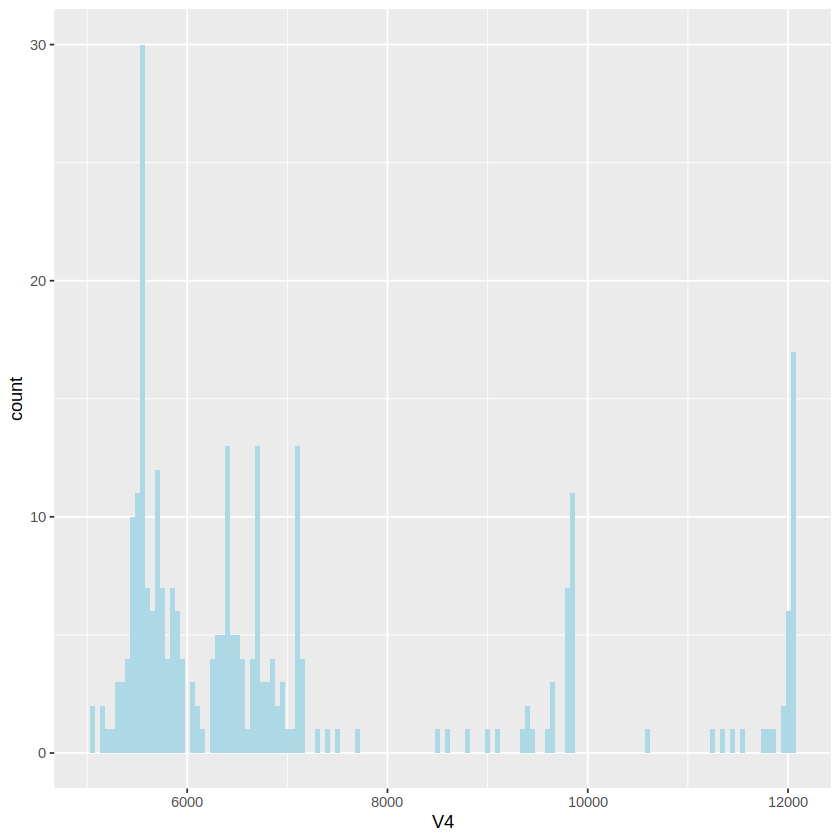

In [8]:
ggplot(subset_overlap, aes(V4))+
    geom_histogram(fill="light blue",binwidth=50)

In [ ]:
nonoverlap<- read.table("A1_nonoverlaping.bed", header = FALSE)

In [19]:
subset_nonoverlap <- nonoverlap[nonoverlap$V4 < 5000,]

In [20]:
max(subset_nonoverlap$V4)

[1] 4999

In [21]:
subset_overlap$type<- "Overlap"

In [22]:
subset_nonoverlap$type<- "Non-overlap"

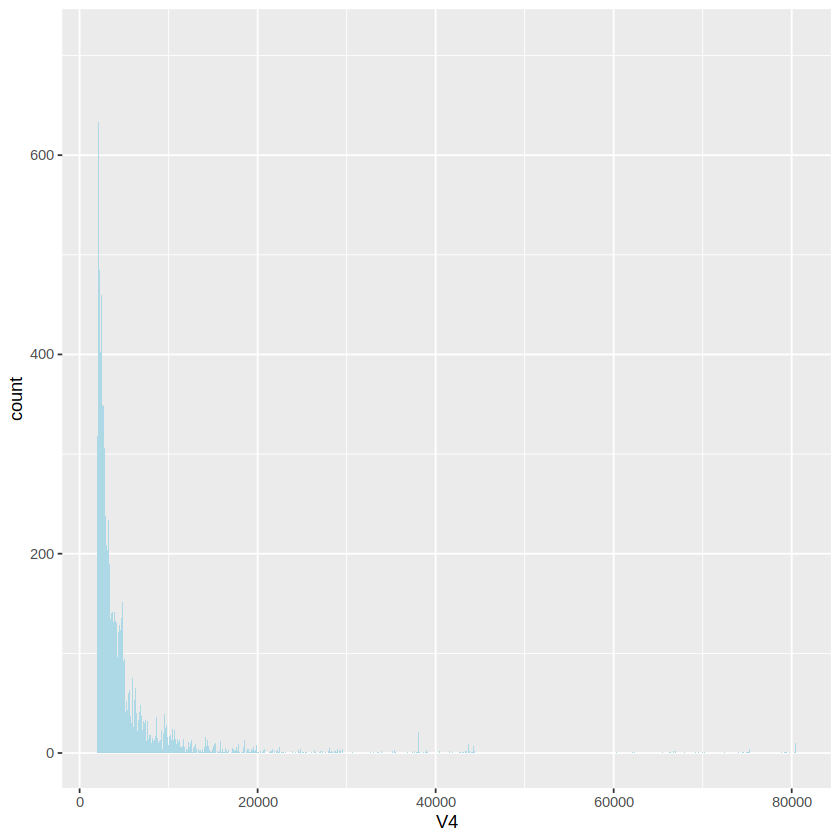

In [29]:
ggplot(subset_nonoverlap, aes(V4))+
    geom_histogram(fill="light blue",binwidth=50)

In [23]:
final_df <- rbind(subset_overlap, subset_nonoverlap)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.Warning message:
“Removed 3 rows containing missing values (`geom_bar()`).”

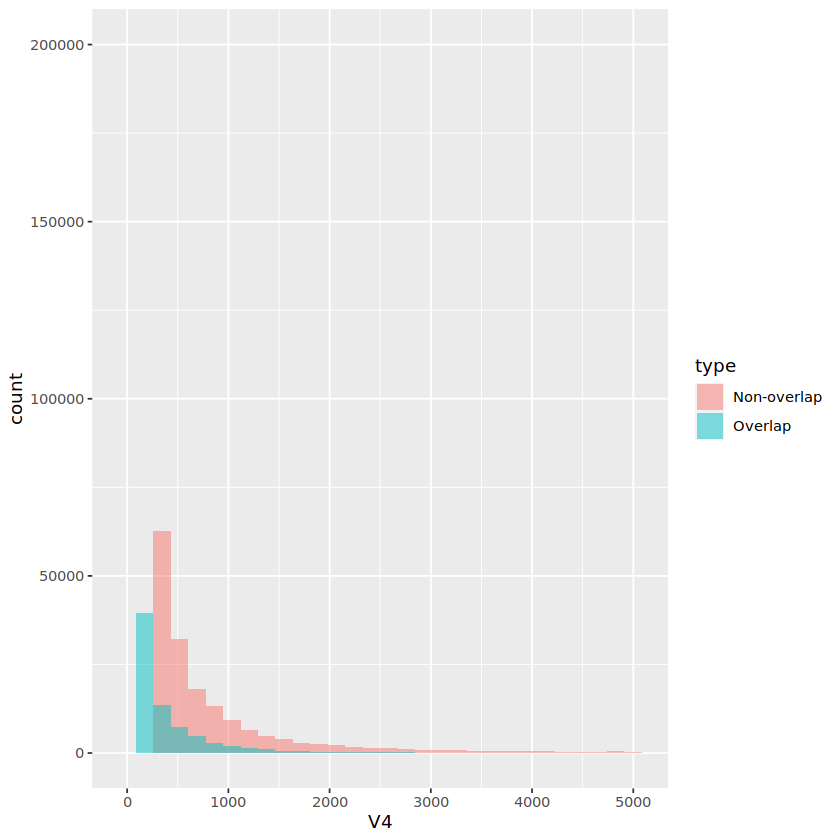

In [35]:
ggplot(final_df, aes(x = V4, fill=type))+
       geom_histogram(position="identity", alpha=0.5)+ ylim(0, 200000)

In [ ]:
both<- rbind(overlaping, non_overlap_df)

In [ ]:
ggplot(both, aes(x=coverage, fill=O_NO, color=O_NO)) +
  geom_histogram(position="identity", alpha=0.5)
    